# Extensión del Hielo Oceánico en ambos hemisferios

El derretimiento constante del hielo oceánico cerca de los casquetes polares es una de las consecuencias más evidentes del cambio climático. Los efectos de dicho derretimiento van mas allá de la simple desaparición de estos ecosistemas. El nivel del mar podría subir drásticamente (afectando cientos de ciudades y comunidades costeñas) y peligrosos fenómenos meteorológicos podrían aparecer debido a el cambio en las corrientes oceánicas y atmosféricas. En este cuaderno de Jupyter, deseo crear una gráfica que nos muestre de manera cualitativa el decrecimiento del hielo oceánico en el hemisferio norte.

## Obtención de Datos
Antes de poder crear gráficas, debemos de obtener datos de buena calidad. Por suerte, el [National Snow and Ice Data Center](https://nsidc.org) proporciona datasets de relacionados a la información que buscamos. En específico, vamos a utilizar dos datasets que contienen la extensión diaria del hielo oceánico para ambos hemisferios (que se encuentran [aquí](https://nsidc.org/data/seaice_index/archives))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# url donde el .csv esta guardado
data_url = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv'

# descargamos el dataset y lo colocamos en un DataFrame de pandas
data = pd.read_csv(data_url, skiprows=1)

# cambiamos los nombres para un facilitar el uso
old_column_names = data.columns
column_names = ['year', 'month', 'day', 'extent', 'missing', 'data product']

data = data.rename(columns={old_column_names[0]: column_names[0], 
                            old_column_names[1]: column_names[1],
                            old_column_names[2]: column_names[2],
                            old_column_names[3]: column_names[3], 
                            old_column_names[4]: column_names[4],
                            old_column_names[5]: column_names[5]})


In [ ]:
# mostramos los primeros cinco dias 
data.head()

,year,month,day,extent,missing,data product
0,1978,10,26,10.231,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
1,1978,10,28,10.420,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
2,1978,10,30,10.557,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
3,1978,11,1,10.670,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
4,1978,11,3,10.777,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...


## Extrayendo la información 
Ahora que ya tenemos los datos, quiero utilizar solo los que estén dentro de un periodo de tiempo que nosotros definamos. Acá escogí los datos entre enero 1 de 1980 y diciembre 31 de 2020.


In [ ]:
# aca podemos escoger un año de inicio y uno final para la gráfica
beginning_year = 1980
ending_year = 2020

# crear un dataset con solo los datos de esos años
time_period_data = data[(data['year'] >= beginning_year) & (data['year'] <= ending_year)]

# mostrar los primeros cinco dias 
time_period_data

,year,month,day,extent,missing,data product
216,1980,1,1,14.200,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1980.01.01/nt_19...
217,1980,1,3,14.302,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1980.01.03/nt_19...
218,1980,1,5,14.414,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1980.01.05/nt_19...
219,1980,1,7,14.518,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1980.01.07/nt_19...
220,1980,1,9,14.594,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1980.01.09/nt_19...
...,...,...,...,...,...,...
13752,2020,12,27,12.592,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2020.12.26/nt_202...
13753,2020,12,28,12.586,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2020.12.27/nt_202...
13754,2020,12,29,12.664,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2020.12.28/nt_202...
13755,2020,12,30,12.679,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2020.12.29/nt_202...


Para la gráfica, en vez de usar los datos diarios como vienen, quiero usar el promedio mensual. Por lo tanto, debemos de calcular dichos promedios.

In [ ]:
# calcular promedios mensuales
# instanciar arreglos vacios para años, meses y promedios
years = np.zeros(0)
months = np.zeros(0)
monthly_average_sea_extent = np.zeros(0)

# usamos bucles para calcular los promedios mensuales
for year in np.arange(beginning_year, ending_year+1):

    # seleccionamos solo los datos de un año
    year_pd = time_period_data[time_period_data['year'] == year]

    for month in np.arange(1, 13):
        # añadir el año y mes a cada arreglo respectivo
        years = np.append(years, year)
        months = np.append(months, month)

        # calculamos el promedio y lo añadimos al arreglo respectivo
        monthly_average_sea_extent = np.append(monthly_average_sea_extent, 
                                               np.average(year_pd[year_pd['month'] == month]['extent']))

# con los arreglos nuevos, creamos un DataFrame de pandas
monthly_average_df = pd.DataFrame(np.vstack((years, months, monthly_average_sea_extent)).T,
                                  columns=['year', 'month', 'average'])

# mostramos algunos elementos
monthly_average_df

,year,month,average
0,1980.0,1.0,14.861875
1,1980.0,2.0,15.955143
2,1980.0,3.0,16.041313
3,1980.0,4.0,15.429067
4,1980.0,5.0,13.792600
...,...,...,...
487,2020.0,8.0,5.084645
488,2020.0,9.0,3.924433
489,2020.0,10.0,5.284839
490,2020.0,11.0,8.985367


## Crear gráfica
Ahora ya podemos crear la gráfica. Específicamente quiero hacer una gráfica de líneas, donde cada línea corresponde a los promedios de un solo año. Además, cada línea va a tener un color que va a corresponder a que tan reciente el año al que corresponde es. Para ello, vamos a usar una escala de colores que va del azul, al blanco y luego al rojo. Las líneas más rojas corresponden a años menos recientes, y las azules a los años más recientes.

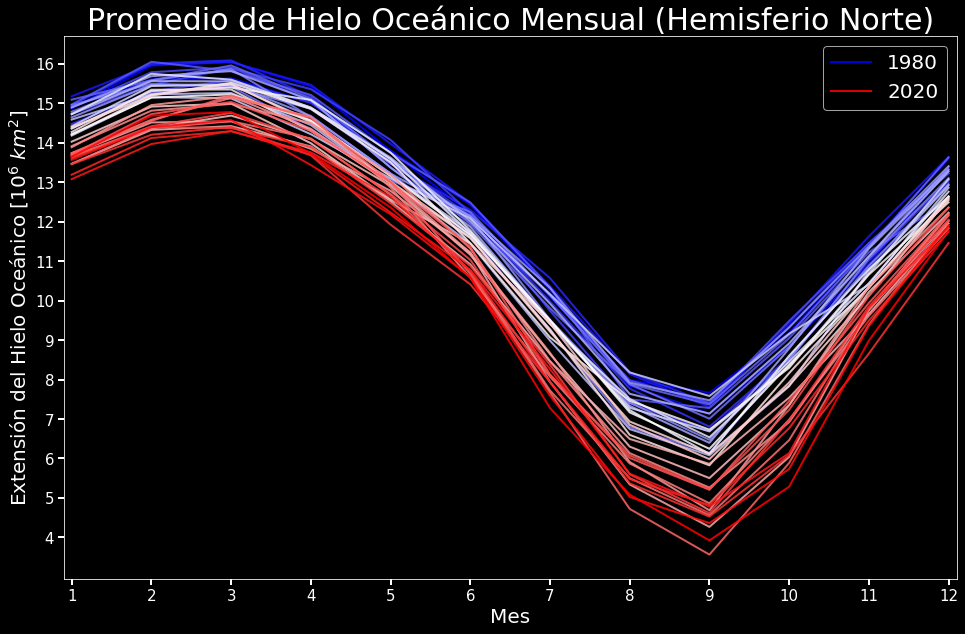

In [ ]:
# vamos a usar un fondo oscuro 
with plt.style.context('dark_background'):
    # creamos la figura y los ejes
    fig1, ax1 = plt.subplots(figsize=(16,10))

    # usamos un bucle para graficar cada año
    for year in np.arange(beginning_year, ending_year+1):

        # el eje x es el mes, por lo que obtenemos los meses del año a graficar
        month = monthly_average_df[monthly_average_df['year'] == year]['month']

        # el eje y es el promedio
        average_sea_extent = monthly_average_df[monthly_average_df['year'] == year]['average']

        # para la escala de colores, calculamos la fracción a la que este año corresponde,
        # siendo 0 el primer año y 1 el último
        r = (year - beginning_year)/(ending_year-beginning_year)

        # graficamos cada linea, y añadimos labels solo al primer y ultimo año
        if year == beginning_year:
            plt.plot(month, average_sea_extent, label=f'{year}', 
                     c=plt.cm.bwr(r), alpha=0.85, linewidth=2)
        elif year== ending_year:
            plt.plot(month, average_sea_extent, label=f'{year}', 
                     c=plt.cm.bwr(r), alpha=0.85, linewidth=2)
        else:
            plt.plot(month, average_sea_extent, 
                     c=plt.cm.bwr(r), alpha=0.85, linewidth=2)

    # añadimos la leyenda
    plt.legend(fontsize=20)

    # añadimos titulo y nombre a los ejes
    plt.title('Promedio de Hielo Oceánico Mensual (Hemisferio Norte)', fontdict={'fontsize': 30})
    plt.xlabel('Mes', fontdict={'fontsize': 20})
    plt.ylabel('Extensión del Hielo Oceánico [$10^6$ $km^2$]', fontdict={'fontsize': 20})
    plt.xlim((0.9,12.1))
    plt.xticks(np.arange(1,13))
    plt.yticks(np.arange(4,17))
    ax1.tick_params(which='major', length=6, width=2, labelsize=15)

    
    # podemos guardar la imagen con la siguiente linea, aca la dejo comentada
    #plt.savefig('N_extension_de_hielo.jpg', dpi=256/2)

    # mostramos la grafica
    plt.show()